In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [10]:
# Loading Dataset
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

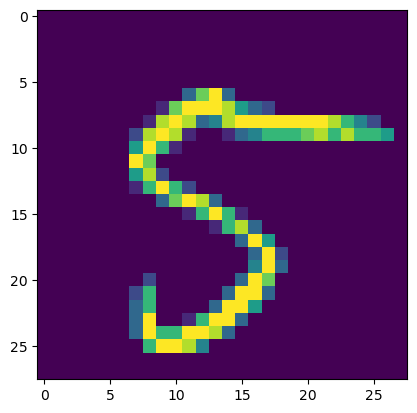

In [11]:
# Use false colors to visualize the array for example 2900.
plt.imshow(X_train[2900])

In [13]:
# Reshaping the images, 

# Need the images as 2D images of 28x28 pixels instead of a flattened stream of 784 pixels and normalized

from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = X_train.reshape(X_train.shape[0], 1, 28, 28)
    test_images = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = X_train.reshape(X_train.shape[0], 28, 28, 1)
    test_images = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [16]:
print(train_images[2900][12])


[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.5529412 ]
 [0.8862745 ]
 [0.22352941]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [21]:
print(y_train)

[5 0 4 ... 5 6 8]


In [19]:
train_labels = tf.keras.utils.to_categorical(y_train, 10)
test_labels = tf.keras.utils.to_categorical(y_test, 10)

In [20]:
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Epoch 1/10
1875/1875 - 68s - loss: 0.1916 - accuracy: 0.9424 - val_loss: 0.0563 - val_accuracy: 0.9816 - 68s/epoch - 37ms/step
Epoch 2/10
1875/1875 - 56s - loss: 0.0801 - accuracy: 0.9766 - val_loss: 0.0378 - val_accuracy: 0.9873 - 56s/epoch - 30ms/step
Epoch 3/10
1875/1875 - 26s - loss: 0.0596 - accuracy: 0.9825 - val_loss: 0.0326 - val_accuracy: 0.9893 - 26s/epoch - 14ms/step
Epoch 4/10
1875/1875 - 28s - loss: 0.0507 - accuracy: 0.9853 - val_loss: 0.0319 - val_accuracy: 0.9899 - 28s/epoch - 15ms/step
Epoch 5/10
1875/1875 - 29s - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0293 - val_accuracy: 0.9908 - 29s/epoch - 16ms/step
Epoch 6/10
1875/1875 - 27s - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0277 - val_accuracy: 0.9918 - 27s/epoch - 15ms/step
Epoch 7/10
1875/1875 - 27s - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0304 - val_accuracy: 0.9915 - 27s/epoch - 14ms/step
Epoch 8/10
1875/1875 - 30s - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0296 - val_accuracy: 0.9913 - 30s/ep

<Axes: >

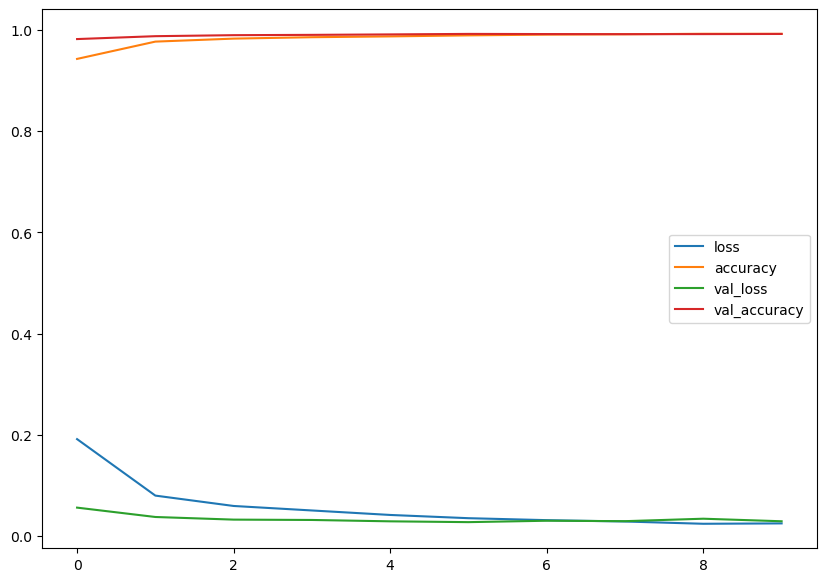

In [23]:
# define a model

model_1 = tf.keras.models.Sequential([
    Conv2D(32, kernel_size=(3, 3),
                 activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),# 64 3x3 kernels
    MaxPooling2D(pool_size=(2, 2)), # Reduce by taking the max of each 2x2 block
    Dropout(0.25), # Dropout to avoid overfitting
    Flatten(), # Flatten the results to one dimension for passing into our final layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # Final categorization from 0-9 with softmax
])        



# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


history_1 = model_1.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

pd.DataFrame(history_1.history).plot(figsize=(10,7))


In [24]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [26]:
score = model_1.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02937895804643631
Test accuracy: 0.9916999936103821
